In [3]:
pip install wordcloud

  Using cached wordcloud-1.9.4-cp313-cp313-win_amd64.whl.metadata (3.5 kB)
Using cached wordcloud-1.9.4-cp313-cp313-win_amd64.whl (300 kB)
Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud
import plotly.io as pio

pio.renderers.default = 'notebook'

df = pd.read_csv("../data/zomato_cleaned.csv")
df.head()


,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Cuisine List
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,yes,no,no,No,3,4.8,Dark Green,Excellent,314,"['French', 'Japanese', 'Desserts']"
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,yes,no,no,No,3,4.5,Dark Green,Excellent,591,['Japanese']
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,yes,no,no,No,4,4.4,Green,Very Good,270,"['Seafood', 'Asian', 'Filipino', 'Indian']"
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,no,no,no,No,4,4.9,Dark Green,Excellent,365,"['Japanese', 'Sushi']"
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,yes,no,no,No,4,4.8,Dark Green,Excellent,229,"['Japanese', 'Korean']"


In [8]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Cuisine List'],
      dtype='object')

C:\Users\hp\AppData\Local\Temp\ipykernel_17628\344178172.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




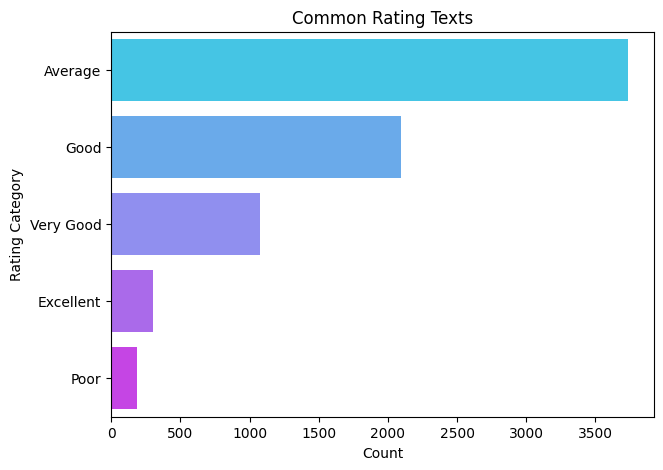

In [5]:
rating_counts = df['Rating text'].value_counts()

plt.figure(figsize=(7,5))
sns.barplot(x=rating_counts.values, y=rating_counts.index, palette='cool')
plt.title("Common Rating Texts")
plt.xlabel("Count")
plt.ylabel("Rating Category")
plt.show()


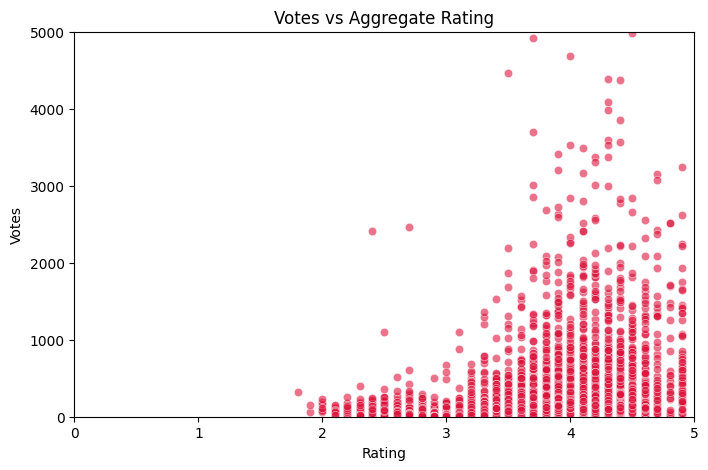

In [6]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='Aggregate rating', y='Votes', data=df, alpha=0.6, color='crimson')
plt.title("Votes vs Aggregate Rating")
plt.xlabel("Rating")
plt.ylabel("Votes")
plt.xlim(0, 5)
plt.ylim(0, 5000)
plt.show()


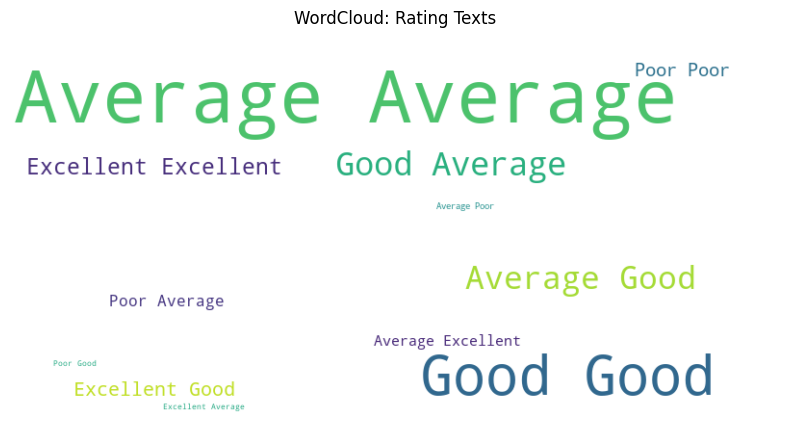

In [10]:
text = ' '.join(df['Rating text'].dropna().tolist())

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("WordCloud: Rating Texts")
plt.show()
